### 6.5 Machine Learning Part 2

This script contains the following:
1. Importing libraries and data and renaming columns
2. Data processing
3. The elbow technique
4. k-means clustering
5. Descriptive statistics 

#### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
#For standardizing features. We'll use the StandardScaler module. 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn
from sklearn.cluster import KMeans # Here is where I import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs I create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [84]:
path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'

In [85]:
df = pd.read_csv(os.path.join(path, 'LAST_CLEANED.csv'))

In [86]:
df.shape

(2373, 18)

In [87]:
df.head()

,name,year,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [93]:
df.shape

(2373, 18)

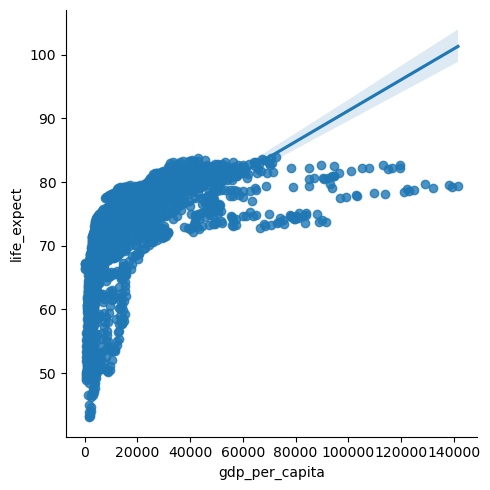

In [32]:
#creating a scatterplot to see the distribution 
sns.lmplot(x = 'gdp_per_capita', y = 'life_expect', data = df)

The domain for life_expect is from around 20 to 85, whereas for gdp_per_capita it is from around 0 to over 140,000. 
Which points to a vast difference between the range of these values. Therefore, we must incorporate an important 
step in our analysis, and we must first standardize our data.

### 2. Data processing (preparing df for cluster analysis)

In [95]:
# Specify the columns I want to remove
columns_to_remove = ['name','continent','life_exp_category','year', 'least_developed', ]

In [96]:
# Drop the specified columns
df_prepared = df.drop(columns=columns_to_remove)

In [97]:
df_prepared.head()

,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita
0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [98]:
df.isnull().sum()

name                         0
year                         0
continent                    0
least_developed              0
life_expect                  0
population                   0
CO2_emiss                    0
health_spend(% of GDP)       0
electr_consum(kWh/capita)    0
forest_area                  0
gdp_per_capita               0
internet_users               0
military_spend               0
open_defecation              0
drinking_water_user          0
adult_obesity                0
beer_per_capita              0
life_exp_category            0
dtype: int64

In [99]:
df.shape

(2373, 18)

#### 2.1 Standardize the data 

In [103]:
scaler = StandardScaler()
df_prepared[df_prepared.columns] = scaler.fit_transform(df_prepared)


/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [104]:
df_prepared.head()

,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita
0,0.261814,-0.286145,-0.713297,0.369341,-0.374782,-0.115026,-0.801119,-1.241405,-0.310695,-0.461587,-0.070652,-0.187989,-0.437045
1,0.302687,-0.286312,-0.708494,0.332044,-0.366724,-0.112720,-0.779547,-1.234495,-0.287833,-0.464760,-0.061996,-0.130149,-0.353374
2,0.338404,-0.286365,-0.679478,0.240563,-0.389421,-0.110415,-0.761756,-1.232396,-0.283930,-0.468057,-0.030314,-0.060739,-0.462495
3,0.368967,-0.286430,-0.661990,0.301826,-0.337084,-0.108109,-0.745106,-1.213405,-0.277824,-0.471306,0.000674,-0.002899,-0.375765
4,0.394865,-0.286503,-0.651316,0.186525,-0.362199,-0.105803,-0.724078,-1.166123,-0.261725,-0.474507,0.030958,0.066510,-0.414542


### 3. The elbow technique

/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

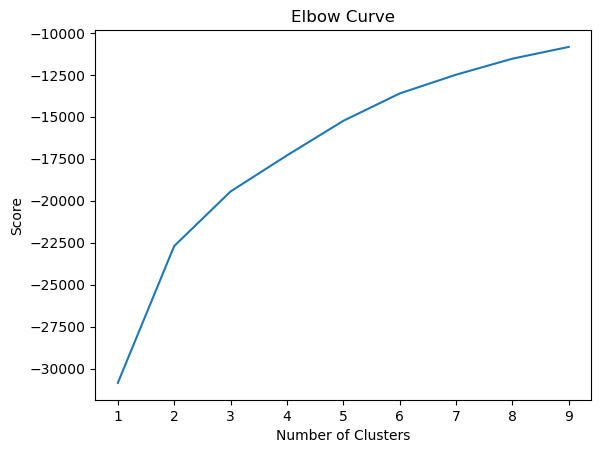

/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

cluster
2    1140
1     707
0     526
Name: count, dtype: int64

In [105]:
num_cl = range(1,10)
# tries to find the best KMeans model for the number of clusters stipulated for each iteration
kmeans = [KMeans(n_clusters = i) for i in num_cl]
# creates a score list, which has scored every number of cluster in KMeans model
score = [kmeans[i].set_params(n_init=10).fit(df_prepared).score(df_prepared) for i in range(len(kmeans))]
# print list of scores for each iteration of KMean
score
# plots the scores for each iteration, with varying number of clusters
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
# create kmeans object
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_prepared)
df_prepared['cluster'] = kmeans.fit_predict(df_prepared)
df_prepared['cluster'].value_counts()

In this example, there's a jump from two to three on the x-axis, but after that, the curve straightens out. 
This means that the optimal count for your clusters is three.

### 4. k-means clustering

In [107]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) #assigns the algorithm (with the three clusters) to a new object, kmeans


In [108]:
# Fit the k-means object to the data.

kmeans.fit(df_prepared) #applies the algorithm to the dataframe

/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

KMeans(n_clusters=3)

In [109]:
df_prepared['clusters'] = kmeans.fit_predict(df_prepared)

/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bente/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [130]:
df_prepared.head()

,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,cluster,clusters
0,0.261814,-0.286145,-0.713297,0.369341,-0.374782,-0.115026,-0.801119,-1.241405,-0.310695,-0.461587,-0.070652,-0.187989,-0.437045,2,2
1,0.302687,-0.286312,-0.708494,0.332044,-0.366724,-0.112720,-0.779547,-1.234495,-0.287833,-0.464760,-0.061996,-0.130149,-0.353374,2,2
2,0.338404,-0.286365,-0.679478,0.240563,-0.389421,-0.110415,-0.761756,-1.232396,-0.283930,-0.468057,-0.030314,-0.060739,-0.462495,2,2
3,0.368967,-0.286430,-0.661990,0.301826,-0.337084,-0.108109,-0.745106,-1.213405,-0.277824,-0.471306,0.000674,-0.002899,-0.375765,2,2
4,0.394865,-0.286503,-0.651316,0.186525,-0.362199,-0.105803,-0.724078,-1.166123,-0.261725,-0.474507,0.030958,0.066510,-0.414542,2,2


In [131]:
df_prepared['clusters'].value_counts()

clusters
2    1140
0     707
1     526
Name: count, dtype: int64

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


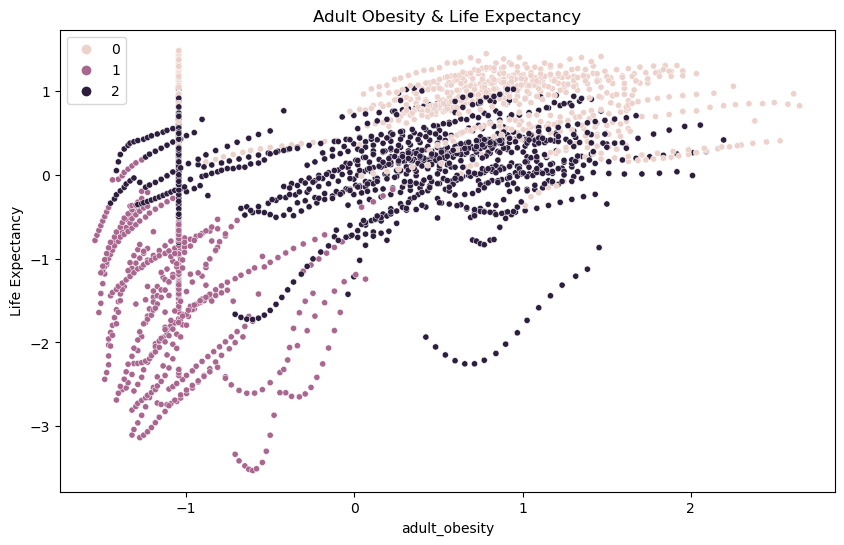

In [127]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['adult_obesity'], y=df_prepared['life_expect'], hue=kmeans.labels_, s=20)
# Here, I am subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
plt.title('Adult Obesity & Life Expectancy')
plt.xlabel('adult_obesity') # Label x-axis.
plt.ylabel('Life Expectancy')# Label y-axis.
ax.grid(False) # This removes the grid from the background.
plt.show()

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


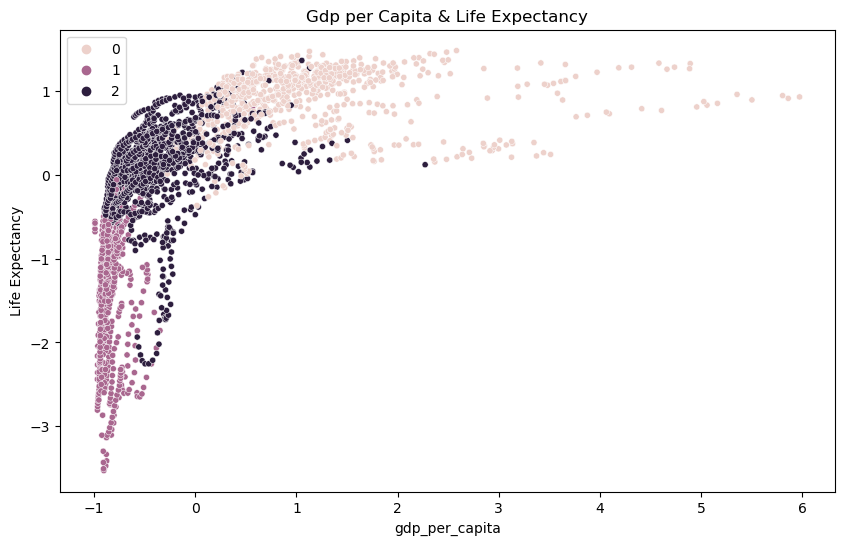

In [126]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['gdp_per_capita'], y=df_prepared['life_expect'], hue=kmeans.labels_, s=20)
# Here, I am subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
plt.title('Gdp per Capita & Life Expectancy')
plt.xlabel('gdp_per_capita') # Label x-axis.
plt.ylabel('Life Expectancy')# Label y-axis.
ax.grid(False) # This removes the grid from the background.
plt.show()

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


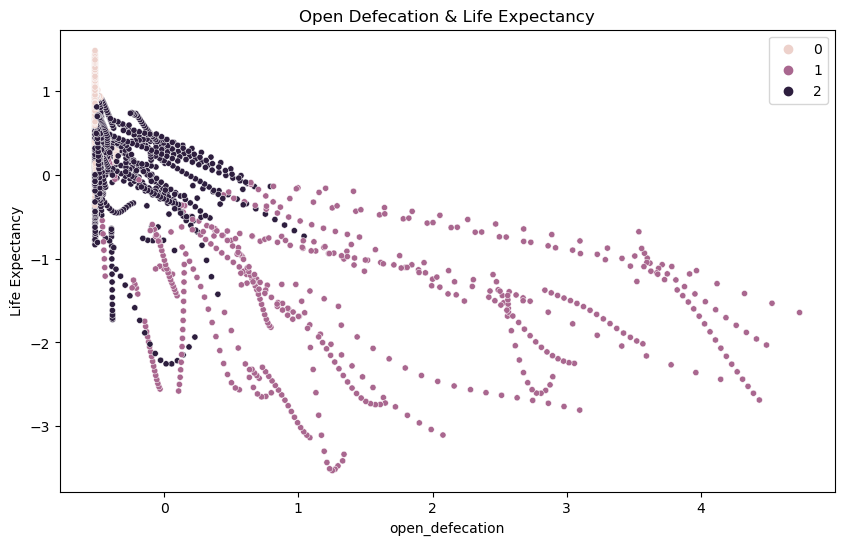

In [125]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['open_defecation'], y=df_prepared['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Open Defecation & Life Expectancy')
plt.xlabel('open_defecation')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


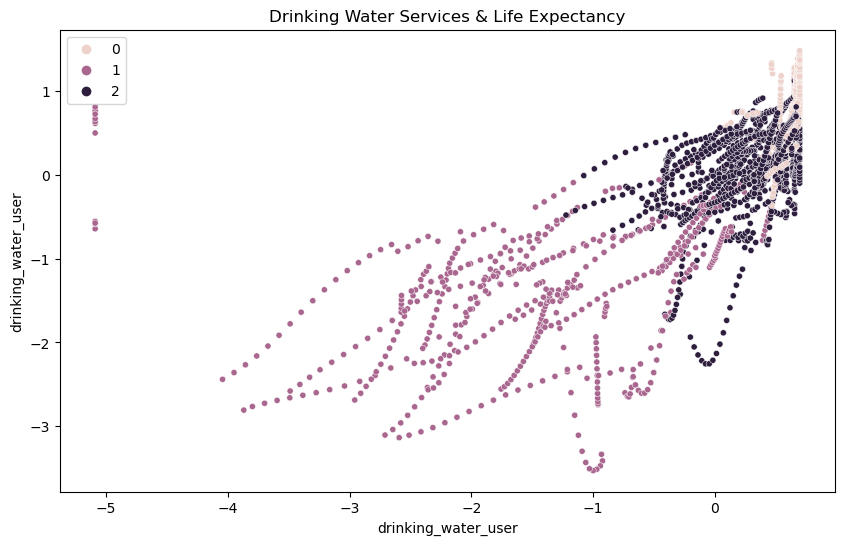

In [121]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['drinking_water_user'], y=df_prepared['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Drinking Water Services & Life Expectancy')
plt.xlabel('drinking_water_user')
plt.ylabel('drinking_water_user')
ax.grid(False)
plt.show()

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


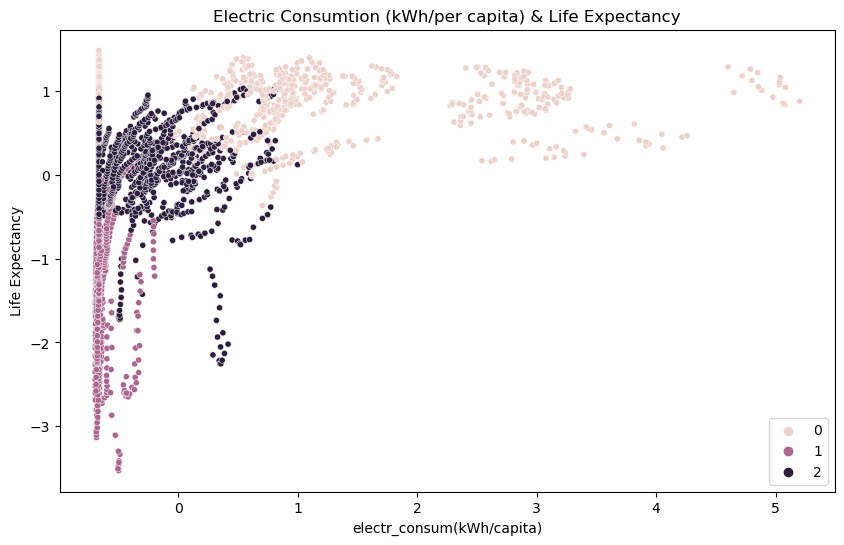

In [124]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['electr_consum(kWh/capita)'], y=df_prepared['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Electric Consumtion (kWh/per capita) & Life Expectancy')
plt.xlabel('electr_consum(kWh/capita)')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'internet_users')

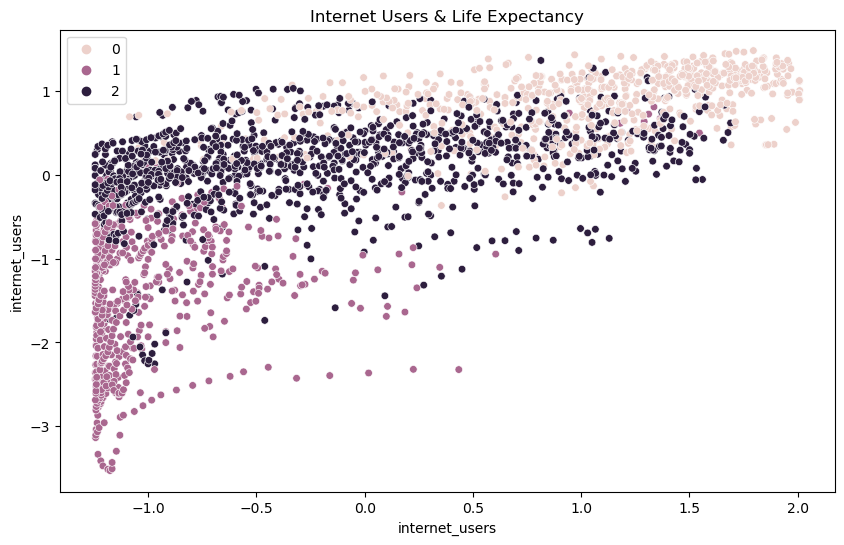

In [128]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['internet_users'], y=df_prepared['life_expect'], hue= kmeans.labels_, s=30)
plt.title('Internet Users & Life Expectancy')
plt.xlabel('internet_users')
plt.ylabel('internet_users')

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'health_spend(% of GDP)')

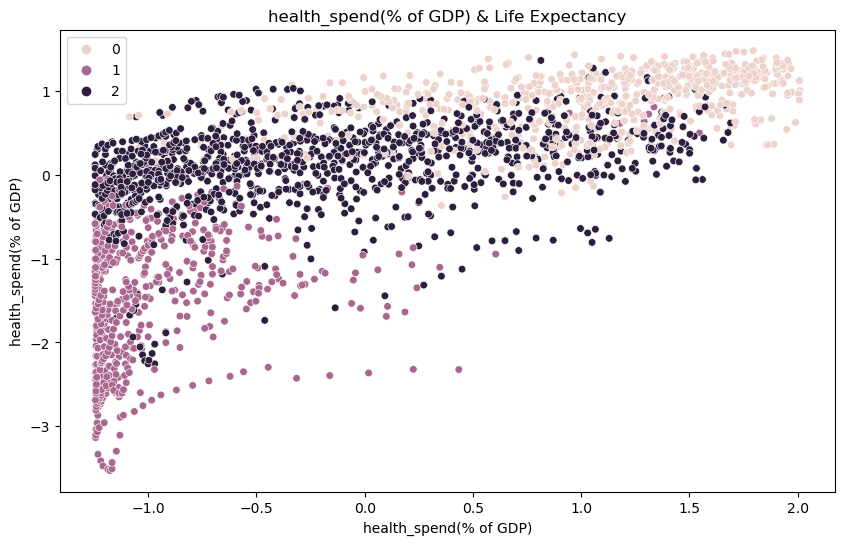

In [135]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_prepared['health_spend(% of GDP)'], y=df_prepared['life_expect'], hue= kmeans.labels_, s=30)
plt.title('health_spend(% of GDP) & Life Expectancy')
plt.xlabel('health_spend(% of GDP)')
plt.ylabel('health_spend(% of GDP)')

 ### 5. Descriptive statistics 

In [136]:
df.loc[df_prepared['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df_prepared['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_prepared['clusters'] == 0, 'cluster'] = 'pink'



In [140]:
df.groupby('cluster').agg({'adult_obesity':['mean', 'median'], 
                         'gdp_per_capita':['mean', 'median'], 
                           'internet_users':['mean', 'median'],
                           'health_spend(% of GDP)':['mean', 'median'],
                        'drinking_water_user':['mean', 'median'],
                        'electr_consum(kWh/capita)':['mean', 'median'],
                           'internet_users':['mean', 'median'],
                         'open_defecation':['mean', 'median'],
                          'life_expect':['mean', 'median']})

adult_obesity        gdp_per_capita               internet_users  \
                     mean median           mean        median           mean   
cluster                                                                        
dark purple     15.229056   16.6   13161.346411  11421.344900      32.127951   
pink            19.820010   21.5   43719.521664  38971.824120      69.406977   
purple           5.431156    5.3    3638.379834   2740.919868       9.165215   

                       health_spend(% of GDP)           drinking_water_user  \
                median                   mean    median                mean   
cluster                                                                       
dark purple  28.178145               6.041925  6.056245           92.776783   
pink         72.834737               8.002951  8.329044           99.364442   
purple        3.922500               4.588603  4.252236           62.261934   

                       electr_consum(kWh/capita)              open_defecation  \
                median                      mean       median            mean   
cluster                                                                         
dark purple  94.300021               1777.322077  1376.913664        2.854393   
pink         99.943482               7092.742269  6298.727678        0.083690   
purple       63.669702                328.282616   167.784676       32.134764   

                       life_expect             
                median        mean     median  
cluster                                        
dark purple   0.656958   72.726734  73.184793  
pink          0.000000   79.064229  79.680488  
purple       26.506810   60.126605  60.867000

Cluster 1 (purple) :
Mean and median values for life expectancy, GPD per capita, Health expenditure and basic drinking water user in this cluster are both relatively lower compared to other clusters.
Interpretation: Countries in this cluster exhibit lower life expectancy and GDP per capita compared to other clusters. They may face socio-economic challenges such as limited access to healthcare, lower standards of living, and economic constraints, contributing to shorter life expectancies.

Cluster 0 (pink) :
Mean and median values for life expectancy, GPD per capita, Health expenditure and basic drinking water user in this cluster are both relatively higher compared to other clusters.
Interpretation: Countries in this cluster exhibit higher life expectancy and GDP per capita compared to other clusters. They likely have well-developed healthcare systems, higher standards of living, and greater access to resources, contributing to longer life expectancies.

Cluster 2 (dark purple):
Mean and median values for life expectancy, GPD per capita, health expenditure and basic drinking water user in this cluster are both relatively moderate compared to other clusters.
Interpretation: Countries in this cluster exhibit moderate life expectancy and GDP per capita. They may have socio-economic conditions that are intermediary between the other two clusters.